<a href="https://colab.research.google.com/github/pmj-chosim/Commit-Project-2023.1.20-2023.2.28-/blob/main/2023.01.31/%EC%BB%B4%ED%93%A8%ED%84%B0%20%EB%B9%84%EC%A0%84%20api%EB%A1%9C%20%EB%8C%80%EC%83%81%20%EA%B0%90%EC%A7%80%ED%95%98%EA%B8%B0%20(%2B%EB%B2%94%EC%9C%84%20%EA%B7%B8%EB%A6%AC%EA%B8%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
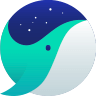
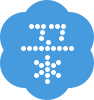

In [2]:
requests.get('http://naver.com').text

In [3]:
endpoint = 'https://labuser1computervision1.cognitiveservices.azure.com/'
key = 'de378383a97744f1988156d930209b6b'

In [4]:
endpoint = endpoint + 'vision/v2.0/'

In [17]:
analysisEndpoint = endpoint + 'analyze'

In [6]:
from PIL import Image
from io import BytesIO

In [7]:
image_url = 'https://cdn.huffingtonpost.kr/news/photo/201602/22260_43420.jpeg'

In [8]:
image = Image.open(BytesIO(requests.get(image_url).content))

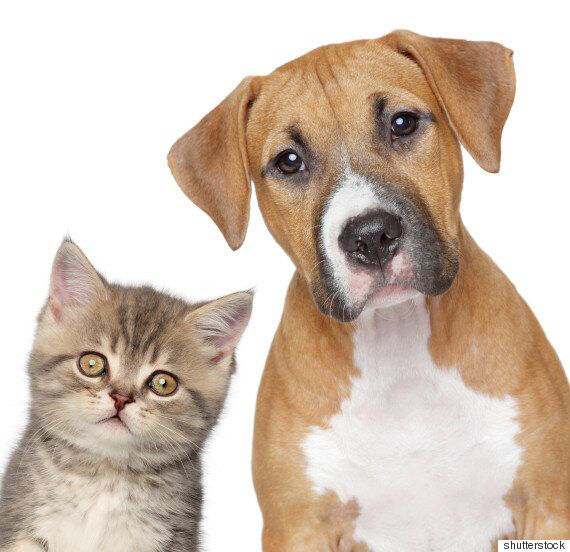

In [9]:
image

In [10]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [11]:
response = requests.post(analysisEndpoint,
                         headers=headers,
                         params=params,
                         json=data)

In [12]:
result = response.json()
result

{'categories': [{'name': 'animal_dog', 'score': 0.99609375}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': '8E633D',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['sitting',
   'cat',
   'brown',
   'indoor',
   'dog',
   'looking',
   'animal',
   'staring',
   'camera',
   'standing',
   'tan',
   'front',
   'table',
   'laying',
   'close',
   'orange',
   'bed'],
  'captions': [{'text': 'a close up of a dog and a cat looking at the camera',
    'confidence': 0.8600457150249555}]},
 'requestId': '63a4f41b-840a-475b-ae96-d69fac21a90d',
 'metadata': {'height': 552, 'width': 570, 'format': 'Jpeg'}}

In [13]:
result['description']

{'tags': ['sitting',
  'cat',
  'brown',
  'indoor',
  'dog',
  'looking',
  'animal',
  'staring',
  'camera',
  'standing',
  'tan',
  'front',
  'table',
  'laying',
  'close',
  'orange',
  'bed'],
 'captions': [{'text': 'a close up of a dog and a cat looking at the camera',
   'confidence': 0.8600457150249555}]}

In [14]:
result['description']['captions']

[{'text': 'a close up of a dog and a cat looking at the camera',
  'confidence': 0.8600457150249555}]

In [16]:
result['description']['captions'][0]['text']

'a close up of a dog and a cat looking at the camera'

In [18]:
detectEndpoint=endpoint+'detect'

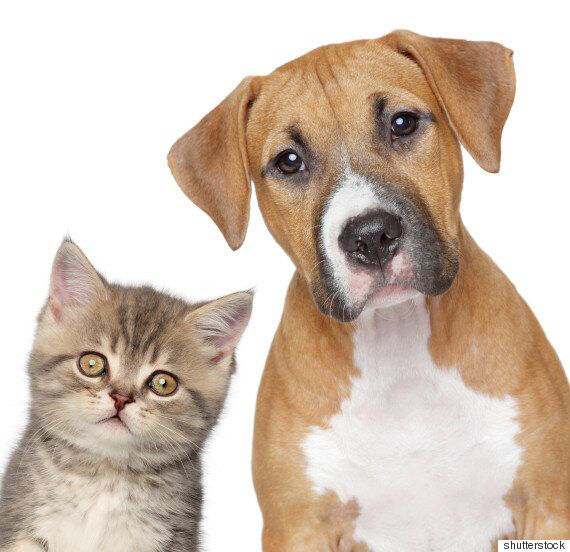

In [19]:
image

In [21]:
headers={'Ocp-Apim-Subscription-key': key}
params={}
data={'url':image_url}

In [22]:
response=requests.post(detectEndpoint,headers=headers, params=params,json=data)

In [23]:
result=response.json()

In [24]:
result

{'objects': [{'rectangle': {'x': 195, 'y': 53, 'w': 360, 'h': 493},
   'object': 'dog',
   'confidence': 0.92,
   'parent': {'object': 'mammal',
    'confidence': 0.934,
    'parent': {'object': 'animal', 'confidence': 0.935}}},
  {'rectangle': {'x': 0, 'y': 235, 'w': 260, 'h': 317},
   'object': 'cat',
   'confidence': 0.869,
   'parent': {'object': 'mammal',
    'confidence': 0.88,
    'parent': {'object': 'animal', 'confidence': 0.881}}}],
 'requestId': '3d3a6441-c0be-46d1-a4d2-a95061941afc',
 'metadata': {'height': 552, 'width': 570, 'format': 'Jpeg'}}

In [30]:
from PIL import Image, ImageDraw, ImageFont

In [53]:
def MakeRectangle(result):
  objects=result['objects']
  for obj in objects:
      print(objects)

      rect=obj['rectangle']
      x=rect['x']
      y=rect['y']
      w=rect['w']
      h=rect['h']

      draw.rectangle(((x,y),(x+w,y+h)),outline='red')

In [54]:
draw=ImageDraw.Draw(image)
MakeRectangle(result)

[{'rectangle': {'x': 195, 'y': 53, 'w': 360, 'h': 493}, 'object': 'dog', 'confidence': 0.92, 'parent': {'object': 'mammal', 'confidence': 0.934, 'parent': {'object': 'animal', 'confidence': 0.935}}}, {'rectangle': {'x': 0, 'y': 235, 'w': 260, 'h': 317}, 'object': 'cat', 'confidence': 0.869, 'parent': {'object': 'mammal', 'confidence': 0.88, 'parent': {'object': 'animal', 'confidence': 0.881}}}]
[{'rectangle': {'x': 195, 'y': 53, 'w': 360, 'h': 493}, 'object': 'dog', 'confidence': 0.92, 'parent': {'object': 'mammal', 'confidence': 0.934, 'parent': {'object': 'animal', 'confidence': 0.935}}}, {'rectangle': {'x': 0, 'y': 235, 'w': 260, 'h': 317}, 'object': 'cat', 'confidence': 0.869, 'parent': {'object': 'mammal', 'confidence': 0.88, 'parent': {'object': 'animal', 'confidence': 0.881}}}]


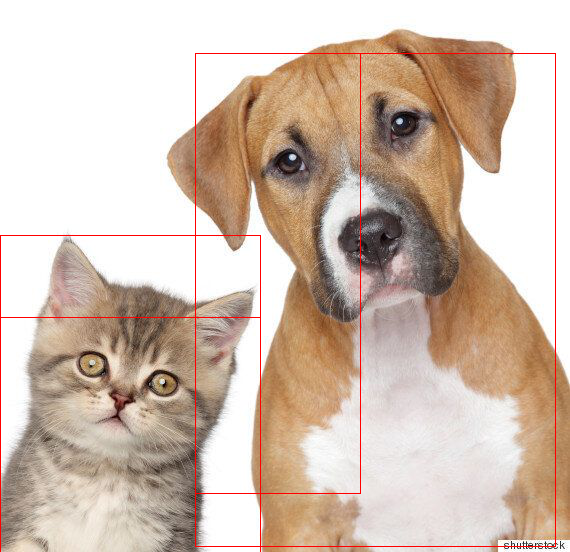

In [55]:
image